   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 11.1 MB/s eta 0:00:00
Fetching data for SPY...


/tmp/ipython-input-3939575424.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  1 of 1 completed



--- GARCH MODEL SUMMARY ---
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1532.34
Distribution:                  Normal   AIC:                           3070.68
Method:            Maximum Likelihood   BIC:                           3085.42
                                        No. Observations:                 1005
Date:                Tue, Jan 27 2026   Df Residuals:                     1005
Time:                        23:27:48   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0505  2.091e

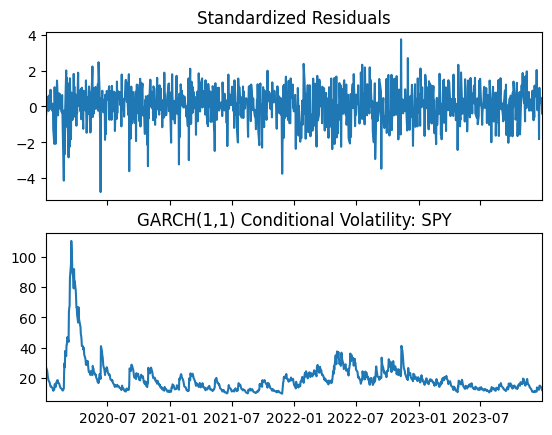


--- INTERPRETATION ---
Alpha (Shock Sensitivity): 0.1627
Beta (Persistence): 0.8099
Sum (Alpha + Beta): 0.9726
✅ Stability: The model is stable (Mean Reverting).
Meaning: Volatility spikes will eventually calm down to the long-run average.


In [1]:
# --- STEP 1: INSTALL LIBRARY (Colab Specific) ---
!pip install arch

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# --- STEP 2: FETCH DATA ---
ticker = 'SPY'
print(f"Fetching data for {ticker}...")
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')['Close']
returns = 100 * data.pct_change().dropna() # Rescale to % for better convergence

# --- STEP 3: FIT GARCH(1,1) MODEL ---
# We use a 'Zero' mean model because daily stock returns are roughly zero
model = arch_model(returns, vol='Garch', p=1, q=1, mean='Zero')
results = model.fit(disp='off') # disp='off' hides the training logs

print("\n--- GARCH MODEL SUMMARY ---")
print(results.summary())

# --- STEP 4: PLOT THE VOLATILITY ---
# The model estimates "Conditional Volatility" (Sigma) for every day
fig = results.plot(annualize='D') # Annualize='D' handles the visual scaling
plt.title(f'GARCH(1,1) Conditional Volatility: {ticker}')
plt.savefig('day7_garch.png')
plt.show()

# --- STEP 5: INTERPRETATION ---
# Extract parameters
omega = results.params['omega']
alpha = results.params['alpha[1]']
beta = results.params['beta[1]']

print(f"\n--- INTERPRETATION ---")
print(f"Alpha (Shock Sensitivity): {alpha:.4f}")
print(f"Beta (Persistence): {beta:.4f}")
print(f"Sum (Alpha + Beta): {alpha + beta:.4f}")

if alpha + beta < 1:
    print("✅ Stability: The model is stable (Mean Reverting).")
    print("Meaning: Volatility spikes will eventually calm down to the long-run average.")
else:
    print("⚠️ Instability: The model is explosive (Alpha + Beta >= 1).")